/Users/dave/miniforge3/envs/sa/lib/python3.11/site-packages/xgboost/data.py:440: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


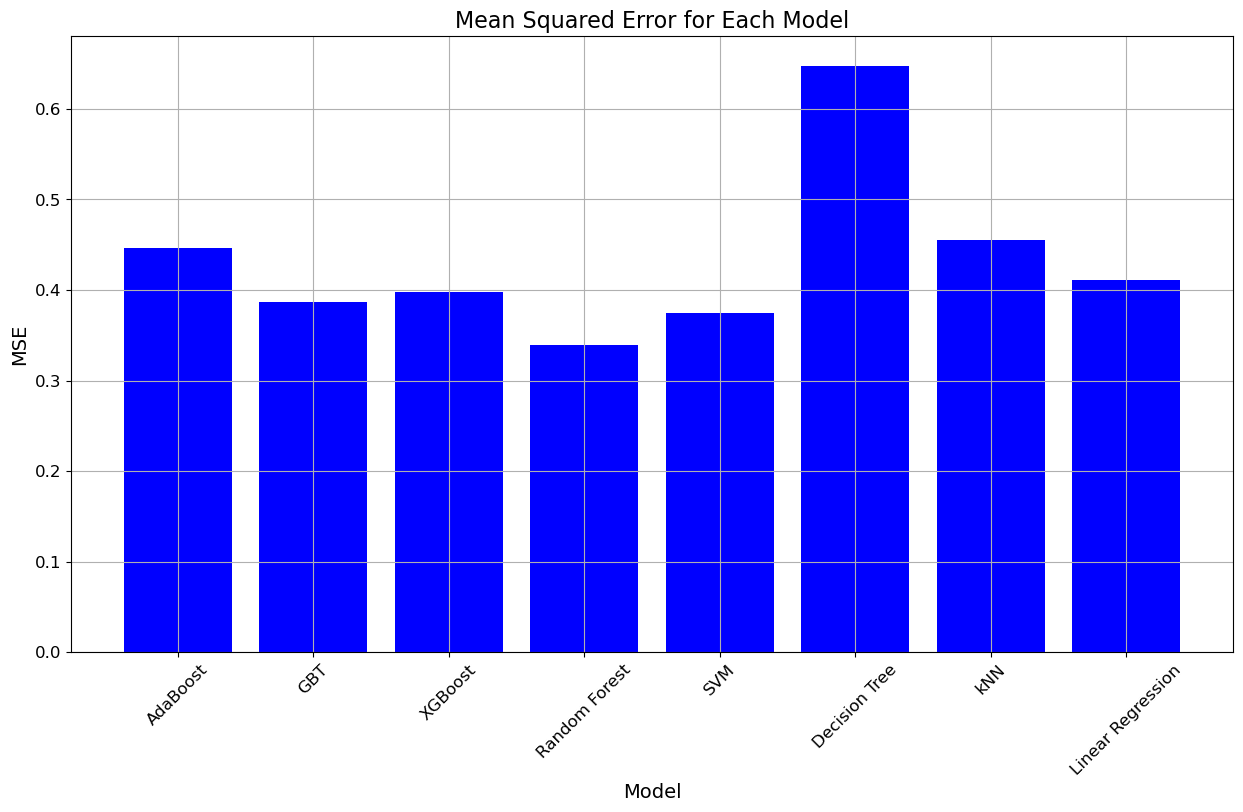

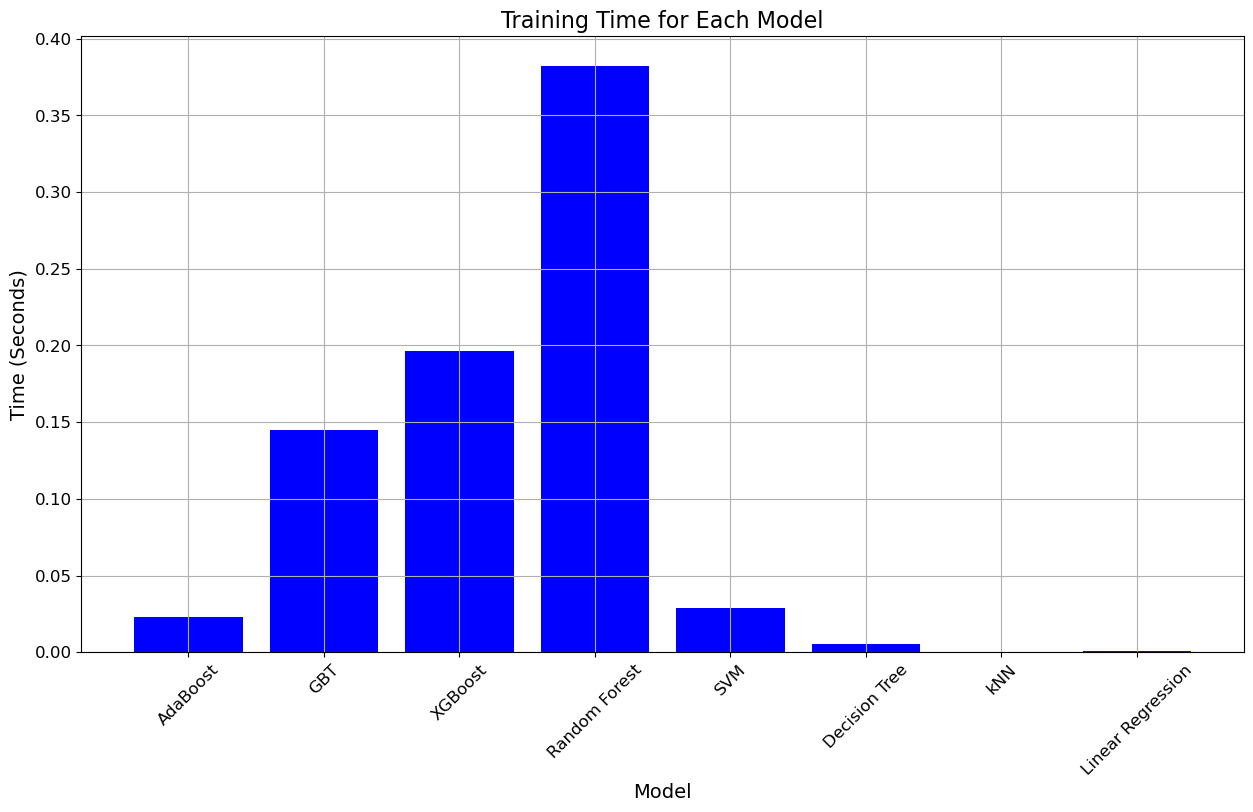

In [11]:
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
import xgboost as xgb
import pandas as pd
from urllib.request import urlretrieve

# Wine Quality Dataset herunterladen
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
urlretrieve(url, 'winequality-red.csv')
data = pd.read_csv('winequality-red.csv', delimiter=';')

X = data.drop('quality', axis=1)
y = data['quality']

# Standardisierung der Merkmale
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Aufteilung in Trainings- und Testdaten
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Modellfunktion definieren
def train_and_evaluate_model(model, X_train, y_train, X_test, y_test):
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time
    test_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, test_pred)
    return mse, training_time

# Modelle und Fehleraufzeichnung
models = {
    "AdaBoost": AdaBoostRegressor(n_estimators=10),
    "GBT": GradientBoostingRegressor(n_estimators=100),
    "XGBoost": xgb.XGBRegressor(n_estimators=100),
    "Random Forest": RandomForestRegressor(n_estimators=100),
    "SVM": SVR(),
    "Decision Tree": DecisionTreeRegressor(),
    "kNN": KNeighborsRegressor(),
    "Linear Regression": LinearRegression()
}

mses = {}
training_times = {}

for name, model in models.items():
    mse, training_time = train_and_evaluate_model(model, X_train, y_train, X_test, y_test)
    mses[name] = mse
    training_times[name] = training_time

# Plot-Funktionen
def plot_metrics(metrics, title, ylabel, filename):
    plt.figure(figsize=(15, 8))
    models = list(metrics.keys())
    metric_values = list(metrics.values())

    plt.bar(models, metric_values, color='blue')
    
    plt.xlabel('Model', fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    plt.title(title, fontsize=16)
    plt.xticks(rotation=45, fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(True)
    plt.savefig(f'../Images/{filename}.png')
    plt.show()

# Plots erstellen
plot_metrics(mses, 'Mean Squared Error for Each Model', 'MSE', 'mse_wine_quality')
plot_metrics(training_times, 'Training Time for Each Model', 'Time (Seconds)', 'training_time_wine_quality')
